###  18.1.3 Hyperplanes

In [2]:
import torch
import torchvision
from torchvision import transforms

# Load in the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans,
                                         train=False, download=True)

# x[1] == 0 is t-shirt
X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0])
display(X_train_0.shape)
# x[1] == 1 is trouser
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1])
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1])
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1])

# Compute averages
# Understand the mean function here
# https://towardsdatascience.com/understanding-dimensions-in-pytorch-6edf9972d3be
# The way to understand the "axis" is 
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)
display(ave_0.shape)

torch.Size([6000, 1, 28, 28])

torch.Size([1, 28, 28])

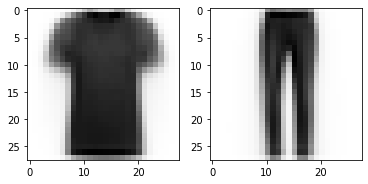

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)
axes[0].imshow(ave_0.reshape(28, 28), cmap="Greys")
axes[1].imshow(ave_1.reshape(28, 28), cmap="Greys")

In [17]:
# learn the threshold from the dataset
w = (ave_1 - ave_0).T
display(w.flatten().shape)
display(X_test.reshape(2000, -1).shape)

torch.Size([784])

torch.Size([2000, 784])